In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [141]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)


C:\Users\rayya\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [375]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [376]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [377]:
#defining X and Y variables 
X = mnist["data"]

In [378]:
y = mnist["target"]

In [379]:
#checking the shape and size of the data
X.shape, y.shape

((70000, 784), (70000,))

'4'

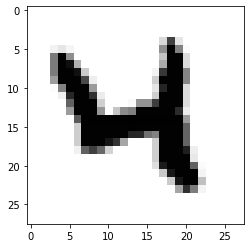

In [380]:
import matplotlib as mpl
some_digit = X[20]
some_digit_show = plt.imshow(X[20].reshape(28,28), cmap=mpl.cm.binary)
y[20]

In [381]:
y = y.astype(np.uint8)

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [385]:
#conerting it into a binary classification task
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [386]:
#standardizing the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [387]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.05566220e+01  2.90128040e+01  2.69137551e+01  2.08402575e+01
  1.81236620e+01  1.57425734e+01  1.37375307e+01  1.25340263e+01
  1.09757578e+01  9.99880179e+00  9.67637402e+00  8.67001577e+00
  8.00368675e+00  7.87018533e+00  7.38777964e+00  7.16610916e+00
  6.71634605e+00  6.60928925e+00  6.39173051e+00  6.21487253e+00
  5.89436458e+00  5.75029083e+00  5.49604033e+00  5.34088499e+00
  5.14356934e+00  4.94245135e+00  4.87608940e+00  4.72418472e+00
  4.50426774e+00  4.38250110e+00  4.31163432e+00  4.23297593e+00
  4.06631127e+00  4.00099149e+00  3.97374174e+00  3.84450579e+00
  3.77747647e+00  3.72605351e+00  3.65697466e+00  3.45118982e+00
  3.42490570e+00  3.35090385e+00  3.27350888e+00  3.23371966e+00
  3.20611153e+00  3.14745821e+00  3.14292821e+00  3.08400641e+00
  3.04119933e+00  2.99633058e+00  2.73351629e-15  2.93287375e+00
  2.88280446e+00  2.84392957e+00  2.81762156e+00  2.78027094e+00
  2.68146675e+00  2.65812854e+00  2.65458516e+00  2.58700198e+00
  2.5713956

In [389]:
#applying PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.05664238, 0.04052   , 0.03758842, 0.02910602, 0.02531196,
       0.02198647, 0.01918618, 0.01750533, 0.01532902, 0.01396457,
       0.01351426, 0.01210876, 0.01117815, 0.0109917 , 0.01031796,
       0.01000837, 0.00938022, 0.0092307 , 0.00892685, 0.00867984,
       0.00823222, 0.008031  , 0.00767591, 0.00745921, 0.00718364,
       0.00690275, 0.00681007, 0.00659791, 0.00629077, 0.00612071,
       0.00602174, 0.00591188, 0.00567911, 0.00558788, 0.00554983,
       0.00536933, 0.00527572, 0.0052039 , 0.00510742, 0.00482002,
       0.00478331, 0.00467996, 0.00457186, 0.00451629, 0.00447773,
       0.00439582, 0.00438949, 0.0043072 , 0.00424741, 0.00418475,
       0.00409612, 0.0040262 , 0.0039719 , 0.00393516, 0.003883  ,
       0.003745  , 0.00371241, 0.00370746, 0.00361307, 0.00359127,
       0.00351549, 0.00346732, 0.00343782, 0.00343361, 0.00336971,
       0.00332042, 0.00329613, 0.0032185 , 0.00317734, 0.0031433 ,
       0.00310697, 0.00309347, 0.00306506, 0.00302295, 0.00298

In [390]:
X_train_pca.shape

(60000, 330)

In [394]:
pca.n_components_

330

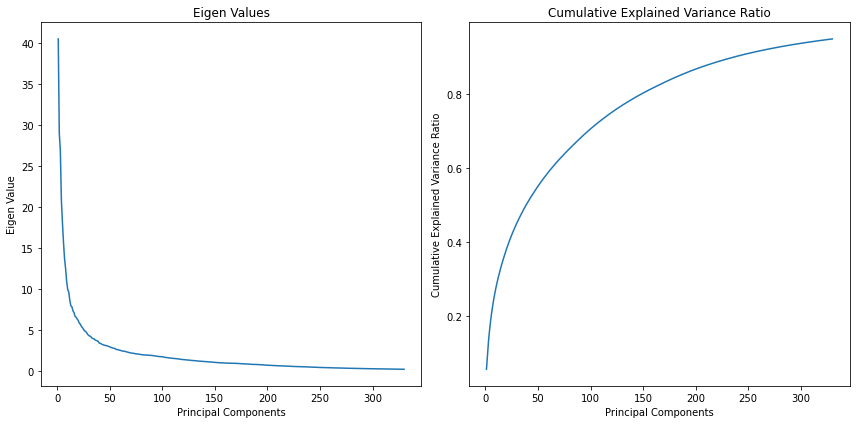

In [395]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, pca.n_components_ +1), pca.explained_variance_)
plt.title('Eigen Values')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Value')


plt.subplot(1, 2, 2)
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.tight_layout()
plt.show()

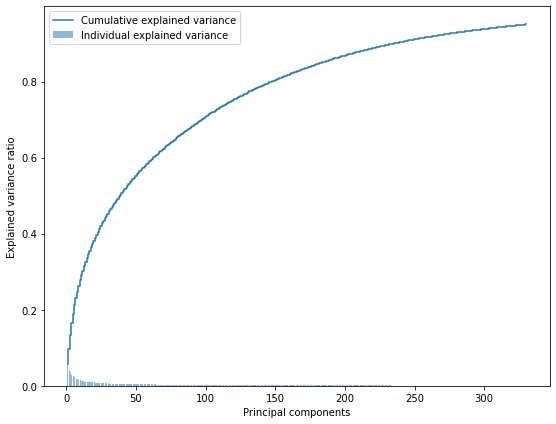

In [396]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label ='Individual explained variance')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label ='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [397]:
pca = PCA(n_components=330)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

clf = LogisticRegression(random_state=42, max_iter = 1000)
clf = clf.fit(X_train_pca, y_train_4)

clf.score(X_test_pca, y_test_4)

0.9832

In [398]:
#from sklearn.linear_model import SGDClassifier

#sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
#sgd_clf.fit(X_train_pca, y_train_4)
#sgd_clf.score(X_test_pca, y_test_4)

In [399]:
y_pred = clf.predict(X_test_pca)

In [400]:
accuracy = accuracy_score(y_test_4, y_pred)
recall = recall_score(y_test_4, y_pred, average='weighted')

In [406]:
precision = precision_score(y_test_4, y_pred)

In [407]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.9832
Recall: 0.9832


In [408]:
Score = f1_score(y_test_4, y_pred)
print(Score)

0.9057239057239057


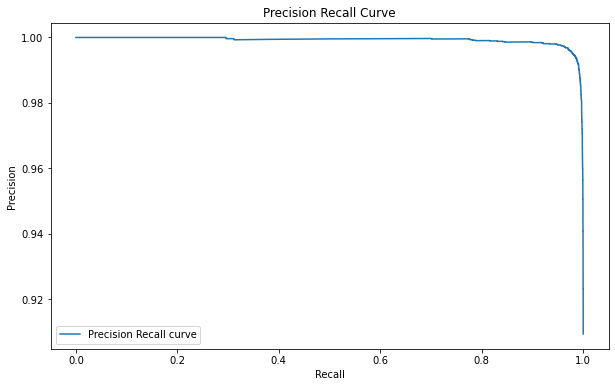

In [409]:
y_probas = clf.predict_proba(X_test_pca)
desired_class = 0
y_test_binary = (y_test_4 == desired_class)

y_scores = y_probas[:, desired_class]
precision, recall, _ = precision_recall_curve(y_test_binary, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

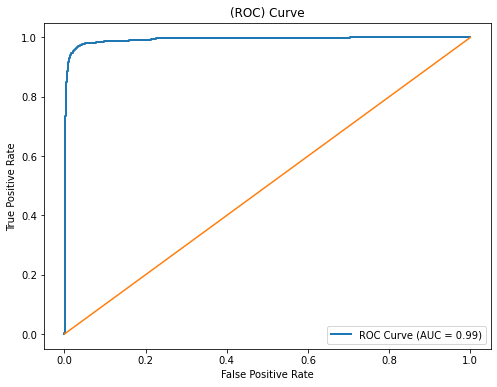

In [411]:
y_scores = clf.decision_function(X_test_pca)
fpr, tpr, _ = roc_curve(y_test_4, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend()
plt.show()